In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\Python\Data Analysis\List of Countries by Sugarcane Production.csv", encoding = "utf-8")

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


# Data Cleaning

In [6]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [9]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [12]:
df["Production (Tons)"] = df["Production (Tons)"].astype("int")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype("float")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype("float")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype("float")

In [15]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [16]:
df.describe(include = "all")

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,103.000000,103,103,1.030000e+02,103.000000,1.020000e+02,102.000000
unique,NaN,103,6,NaN,NaN,NaN,NaN
top,NaN,Brazil,Africa,NaN,NaN,NaN,NaN
freq,NaN,1,39,NaN,NaN,NaN,NaN
mean,51.000000,NaN,NaN,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,29.877528,NaN,NaN,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,0.000000,NaN,NaN,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,25.500000,NaN,NaN,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,51.000000,NaN,NaN,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,76.500000,NaN,NaN,6.145648e+06,144004.500000,8.047400e+04,73282.700000


In [26]:
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].fillna(2.498981e+05)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].fillna(52628.078431)

In [28]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64

In [33]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [34]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205.0,75167.500000
1,India,Asia,348448000,260721.000,4950000.0,70393.500000
2,China,Asia,123059739,88287.000,1675215.0,73459.100000
3,Thailand,Asia,87468496,1264.303,1336575.0,65442.200000
4,Pakistan,Asia,65450704,324219.000,1130820.0,57879.000000
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16.000,3.0,28386.400000
99,Djibouti,Africa,53,51.000,249898.1,52628.078431
100,Singapore,Asia,50,9.000,2.0,25.000000
101,Samoa,Oceania,12,6.000,1.0,11949.800000


In [36]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205.0,75167.500000
1,India,Asia,348448000,260721.000,4950000.0,70393.500000
2,China,Asia,123059739,88287.000,1675215.0,73459.100000
3,Thailand,Asia,87468496,1264.303,1336575.0,65442.200000
4,Pakistan,Asia,65450704,324219.000,1130820.0,57879.000000
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16.000,3.0,28386.400000
99,Djibouti,Africa,53,51.000,249898.1,52628.078431
100,Singapore,Asia,50,9.000,2.0,25.000000
101,Samoa,Oceania,12,6.000,1.0,11949.800000


C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_10052\2425897376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_10052\2425897376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

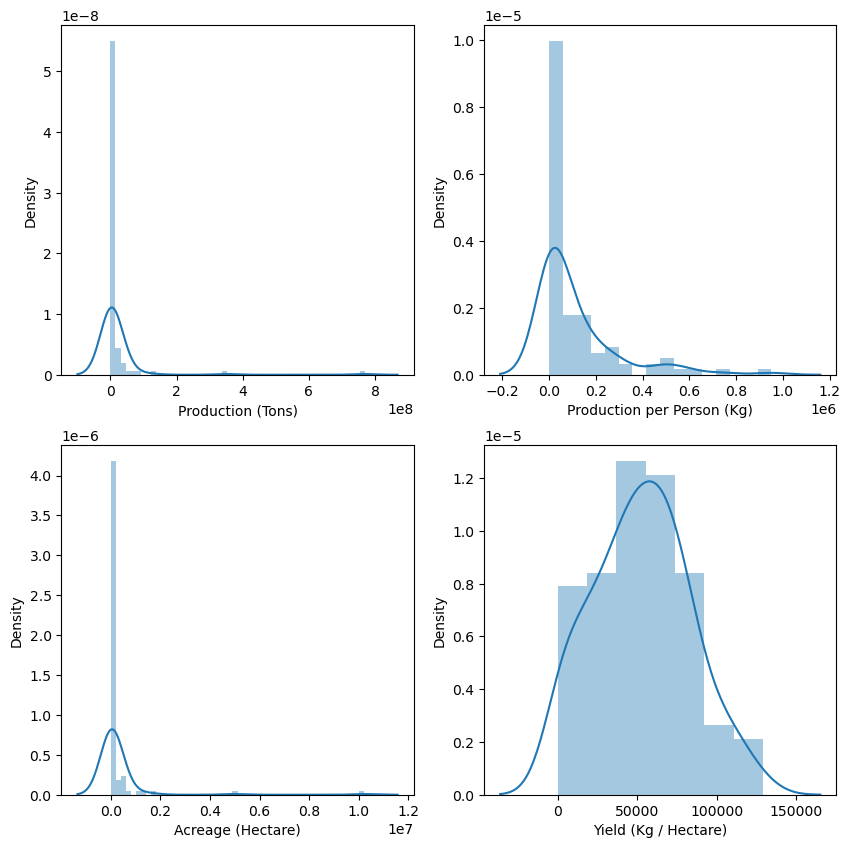

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

<Axes: >

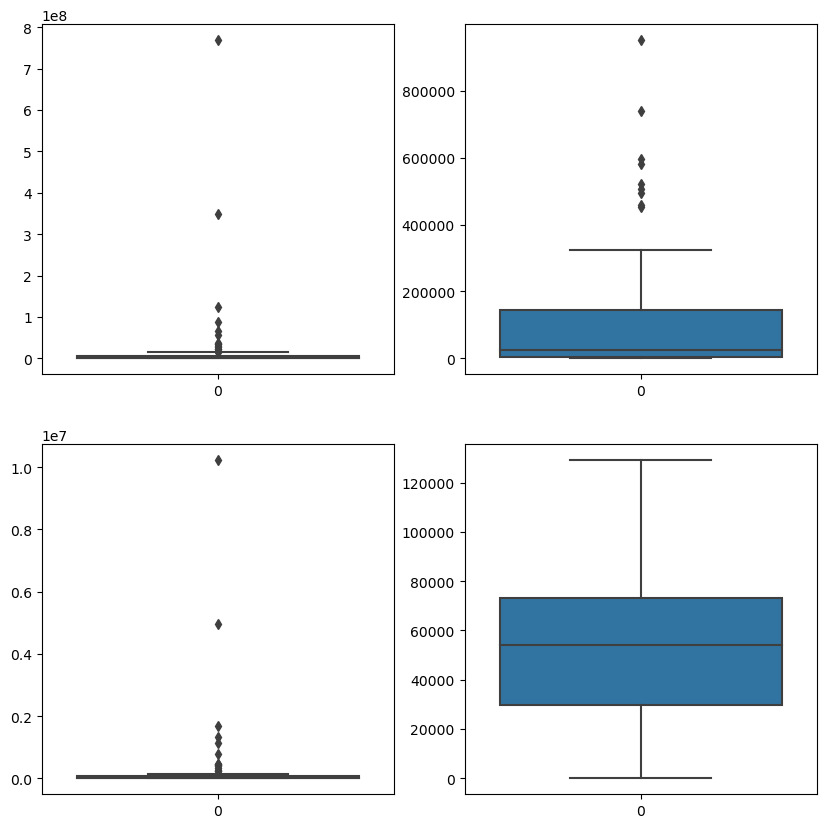

In [49]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])

In [51]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205.0,75167.5
1,India,Asia,348448000,260721.000,4950000.0,70393.5
2,China,Asia,123059739,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704,324219.000,1130820.0,57879.0


# Which country produces maximum Sugarcane?

In [53]:
country_prod_df = df[["Country", "Production (Tons)"]]

In [58]:
country_prod_df.set_index("Country", inplace = True)

In [60]:
country_prod_df.head()

,Production (Tons)
Country,
Brazil,768678382
India,348448000
China,123059739
Thailand,87468496
Pakistan,65450704


In [63]:
country_prod_df["Production (Tons)%"] = (country_prod_df["Production (Tons)"]/country_prod_df["Production (Tons)"].sum())*100

C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_10052\1483347863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_prod_df["Production (Tons)%"] = (country_prod_df["Production (Tons)"]/country_prod_df["Production (Tons)"].sum())*100


In [92]:
country_prod_df.head()

,Production (Tons),Production (Tons)%
Country,,
Brazil,768678382,40.727284
India,348448000,18.462001
China,123059739,6.520138
Thailand,87468496,4.634389
Pakistan,65450704,3.467809


In [81]:
country_prod_df.sort_values(by ="Production (Tons)", ascending = False, inplace = True)


C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_10052\2751471412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_prod_df.sort_values(by ="Production (Tons)", ascending = False, inplace = True)


In [90]:
print("Country with high production is '",country_prod_df.index[0].upper(),"' with production",
          country_prod_df["Production (Tons)"][0],"Tons")

Country with high production is ' BRAZIL ' with production 768678382 Tons


In [102]:
sns.barplot(x = "Country", y= "Production (Tons)", data = country_prod_df )

ValueError: Could not interpret input 'Country'

# Which Country has highest land?